### The ‘astsa‘ package contains a time series data called ‘jj’ . We saw this data in the first lecture. The goal of this homework is to fit an AR process into this this data. Use the following steps (answer the questions in the steps too) in Python for model-fitting:

### Q1. Plot the data. Does it look like a stationary time series data? Explain.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astsadata

jjdata = pd.DataFrame(astsadata.jj)
jjdata["quarters"] = jjdata.index.astype(str)
jjdata.head()

,value,quarters
index,,
1960Q1,-0.342490,1960Q1
1960Q2,-0.462035,1960Q2
1960Q3,-0.162519,1960Q3
1960Q4,-0.820981,1960Q4
1961Q1,-0.494296,1961Q1


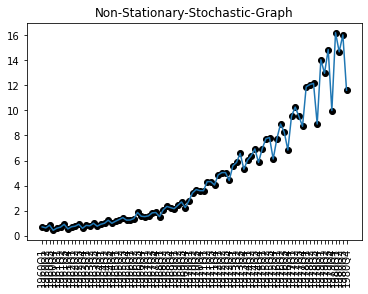

In [2]:
plt.xticks(rotation = 90)

plt.title("Non-Stationary-Stochastic-Graph")
plt.scatter(jjdata["quarters"], jjdata["value"], color = "black")
plt.plot(jjdata["quarters"], jjdata["value"])
plt.show()

No, 

A stationary time series has statistical properties that do not vary in time such as mean, variance etc., but this graph is increasing with time which says mean is changing if compare from one part of the graph with another partand also values are more deviating from mean as it goes upward, hence we can conlclude that graph is not-stationary.

### Q2. Transform the data to make it stationary. First take the log transformation. Then apply differencing. (Here ‘log transformation‘ of the data means replacing the data by taking logs of all the values in the original data. ‘Differencing‘ means replacing a time series Xt by Yt = Xt - Xt−1.)

#### Applying Log transformation

In [3]:
def log_conversion(data):
    return np.log(data)

jjdata["value"] = log_conversion(jjdata["value"])

#### Applying Differencing 

In [4]:
def differencing(data):
    ar = []
    ar.append(jjdata["value"][0])
    for i in range(1, len(jjdata["value"])):
        ar.append(jjdata["value"][i] - jjdata["value"][i-1])
        
    return ar

data = differencing(jjdata["value"])

### Q3. Plot the transformed data. Does it appear to be stationary?

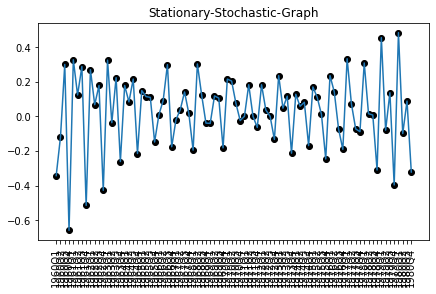

In [5]:
plt.figure(figsize=(7, 4))
plt.xticks(rotation = 90)

plt.title("Stationary-Stochastic-Graph")
plt.scatter(jjdata["quarters"], data, color = "black")
plt.plot(jjdata["quarters"], data)
plt.show()

Yes,

It's a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no seasonal trend or seasonal effects, which says this is stationary.

### Q4. Calculate and plot the acf and pacf of the transformed data. What can you conclude from the plots of acf and pacf? (In my calculations an AR(4) model should be a good fit.)

In [6]:
from statsmodels.tsa.stattools import acf, acovf, pacf

acf_of_ar = acf(data, nlags= 40)
pacf_of_ar = pacf(data, nlags= 40)

####  Plotting Autocorrelation Function (ACF)

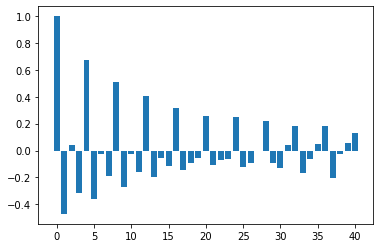

In [7]:
plt.bar(np.arange(41), acf_of_ar)
plt.show()

#### Partial Autocorrelation Function (PACF)

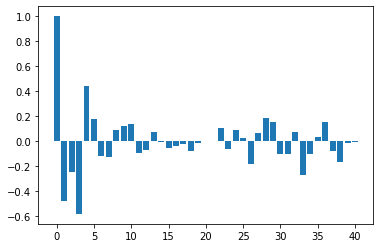

In [8]:
plt.bar(np.arange(41), pacf_of_ar)
plt.show()

ACF plot is gradually decreasing and PACF has 4 significat values, hence can conclude that It is a AR process of order 4.

### Q5. Estimate the parameters of the fitted model and write the final answer in the form of an AR process.

In [9]:
rho_1 = acf(data)[1]
rho_2 = acf(data)[2]
rho_3 = acf(data)[3]
rho_4 = acf(data)[4]

rho = [1, rho_1, rho_2, rho_3, rho_4]

#### Defining symmetric matrix of AR(4)

In [10]:
Sym_matrix = [[1 , rho_1, rho_2, rho_3], [rho_1, 1, rho_3, rho_2], [rho_2, rho_3, 1, rho_1], [rho_3, rho_2, rho_1, 1]]

#### Calculating coefficients(ai's) of AR(4) process by solving 4 linear equations using Yule-Walker equations.

In [16]:
soln = np.linalg.solve(Sym_matrix, [rho_1, rho_2, rho_3, rho_4])
soln

array([-0.4192689 , -0.22451597, -0.14606519,  0.48185095])

#### Extracting Gamma_0  from ACOVF values.

In [12]:
gamma_0 = acovf(data)[0]

#### Calculating variance of the Noise in AR(4) ( Assumed mean = 0 in this process ).

In [13]:
term1 = 0
for i in range(len(soln)):
    term1 = term1 + soln[i]*soln[i]

term2 = 0
for i in range(len(soln)):
    for j in range(len(soln)):
        if i != j:
            term2 = term2 + soln[i]*soln[j]*rho[abs(i-j)]

variance = gamma_0 * (1 - term1 - term2)
variance

0.02010249121546484

#### Calculating deviation from variance of the Noise ~ N(0, variance) of AR(4).

In [14]:
Deviation = np.sqrt(variance)
Deviation

0.14178325435489497

# So, finally AR(4) looks as below
## X_t = - 0.4192689 * X_t-1 - 0.22451597 * X_t-2 - 0.14606519 * X_t-3 + 0.48185095 * X_t-4 + Noise ~ N(mean, Variance), where mean  = 0 and variance  = 0.02010249121546484.
